In [97]:
### import libraries
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import pandas as pd

In [98]:
### open text file and read line by line
def open_file(path):
    with open(path,"rt") as content:
        list_of_lines = content.readlines()
        return list_of_lines
        
lines = open_file("/Users/oakinyemi/intel_assignment.txt")


In [199]:
# initialize a dictionary for storing speeds, cpu marks and prices

info_dict = {"model":[], "class":[], "gen":[], "speed":[], 
             "price":[], "cpu_mark":[]}

''' Loop through the lines and input keys and values into the dictionary 
 on the condition that "intel core" is in the line '''

models = ["i3", "i5", "i7", "i9"]

for line in lines:
    if "Intel Core" in line and any(model in line for model in models):
        
        # use regex to search to find patterns
        
        speed = re.findall(r"....GHz",line)
        price = re.findall(r"\$\d+(?:,\d{3})*(?:\.\d+)?",line)
        cpu_mark =re.findall(r"[^\$]\d+(?:,\d{3})", line)
        if len(line) >= 2:
            model = str(line).split(" ")[2]
            #model = model[0:2]
            if len(model)
        
        # only record lines where there's information for all fields
        
        if len(speed)==len(price)==len(cpu_mark)==1:
            # strip the units and convert to floating numbers
            speed =float(speed[0].rstrip("GHz")); 
            cpu_mark = float(cpu_mark[0].replace(",",""))
            price =float(price[0].replace(",","").rstrip("*").lstrip("$"))    
            
            info_dict["model"].append(model)
            info_dict["class"].append(model[0:2])
            info_dict["speed"].append(speed)
            info_dict["price"].append(price)
            info_dict["cpu_mark"].append(cpu_mark)
df = pd.DataFrame(info_dict)

In [420]:
df = df.round(2)
df.head(10)

,model,class,speed,price,cpu_mark
0,i9-11900KF,i9,3.5,499.99,3599.0
1,i9-11900F,i9,2.5,409.99,3537.0
2,i9-11900K,i9,3.5,519.99,3513.0
3,i7-11700K,i7,3.6,349.99,3441.0
4,i9-11900,i9,2.5,439.99,3436.0
5,i7-11700KF,i7,3.6,298.00,3415.0
6,i9-11900KB,i9,3.3,539.00,3413.0
7,i9-11900T,i9,1.5,439.00,3401.0
8,i5-11600KF,i5,3.9,248.97,3385.0
9,i5-11600K,i5,3.9,249.99,3381.0


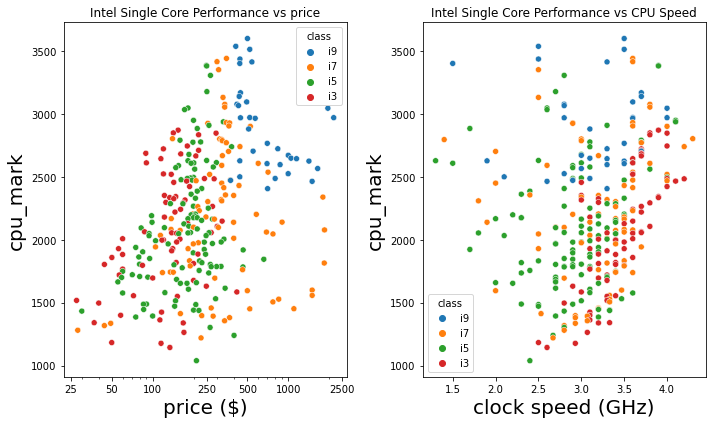

In [330]:
import seaborn as sns
def plot(dataframe, x, y, hue, ax, xlabel, ylabel, logscale=True):
    sns.scatterplot(data = dataframe, x = x, y = y, hue = hue, ax=ax)
    if logscale:
        ax.set_xscale("log")
        ax.xaxis.set_major_formatter(ScalarFormatter())
        ax.set_xticks([25,50,100,250,500,1000,2500])
    else:
        ax.set_xscale("linear")
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    legend_drawn_flag=True
   

fig, axes = plt.subplots(1,2, figsize = (10,6))
axes[0].set_title("Intel Single Core Performance vs price")
axes[1].set_title("Intel Single Core Performance vs CPU Speed")
plot(df, "price", "cpu_mark", "class", axes[0], "price ($)", 
     "cpu_mark", logscale=True)

plot(df, "speed", "cpu_mark", "class", axes[1], "clock speed (GHz)", 
     "cpu_mark", logscale=False)
fig.tight_layout()

In [418]:
#print("The speed statistics per class is given by: \n")
#print(pd.DataFrame(df.groupby("class").describe()["cpu_mark"]).round(2))

variables = ["speed", "price", "cpu_mark"]

for var in variables:
    print("The " + var + " statistics per class is given by: \n")
    print(pd.DataFrame(df.groupby("class").describe()[var]).round(2))
    print("\n")

The speed statistics per class is given by: 

       count  mean   std  min  25%  50%   75%  max
class                                             
i3      71.0  3.44  0.36  2.5  3.2  3.4  3.70  4.2
i5     115.0  2.93  0.52  1.3  2.7  3.0  3.25  4.1
i7      81.0  3.17  0.56  1.4  2.9  3.3  3.50  4.3
i9      34.0  3.13  0.57  1.5  2.8  3.3  3.50  4.0


The price statistics per class is given by: 

       count    mean     std     min     25%     50%     75%      max
class                                                                
i3      71.0  148.23   75.27   27.44  106.50  142.00  178.99   417.42
i5     115.0  197.48   94.04   29.99  144.34  197.99  246.43   659.99
i7      81.0  419.87  384.88   28.00  215.19  323.00  396.00  1850.00
i9      34.0  776.61  467.24  375.00  440.96  544.50  965.92  2163.00


The cpu_mark statistics per class is given by: 

       count     mean     std     min     25%     50%     75%     max
class                                                      